In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sudoku-3m.csv')

In [13]:
df.head()

,id,puzzle,solution,clues,difficulty
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2
1,2,...81.....2........1.9..7...7..25.934.2..........,9348172567286534196159427381764258934523981673...,23,0.0
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1


In [14]:
# 先把id列去掉，再把puzzle中的.换成0，比如.4.1..............653.....1.8.9..74...24..91.... to 040100000000000000653000001080900740002400910000
df = df.drop('id', axis=1)
df['puzzle'] = df['puzzle'].apply(lambda x: x.replace('.', '0'))

In [15]:
df.head()

,puzzle,solution,clues,difficulty
0,1005037006030080900000098000100000008761000000...,1985437266432785915276198439147352688761924352...,27,2.2
1,0008100000200000000109007000700250934020000000...,9348172567286534196159427381764258934523981673...,23,0.0
2,0050007403006000190000010050007000209000058007...,2159837463876542194692713855387169249413258677...,25,2.6
3,0000000050200090000900200037300481000003600005...,4738169256285397411954278637329481569413652785...,26,1.4
4,0401000000000000006530000010809007400024009100...,9471536821286493576532874913819267455724389164...,25,1.1


In [18]:
# 根据difficulty, 应该是0-10，每个区间给我取出100个，做成一个子集
# 创建一个空的 DataFrame，用于存放结果
result_df = pd.DataFrame()

# 定义 difficulty 的区间（0到10，每步间隔1）
difficulty_bins = list(range(0, 11))
difficulty_labels = [i for i in range(len(difficulty_bins)-1)]

# 为了分区添加 difficulty 区间列
df['difficulty_range'] = pd.cut(df['difficulty'], bins=difficulty_bins, labels=difficulty_labels, include_lowest=True)

# 从每个区间提取100个样本
for label in difficulty_labels:
    subset = df[df['difficulty_range'] == label]
    sampled_subset = subset.sample(n=100, random_state=42) if len(subset) >= 100 else subset
    result_df = pd.concat([result_df, sampled_subset], ignore_index=True)

# 保存结果到一个新的 CSV 文件
result_df.to_csv('sampled_puzzles.csv', index=False)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('output1.csv')
# 把df中difficulty<=7的拿出来
# df1 = df[df['difficulty'] <= 7]
# df.head()
df.describe()

,clues,difficulty,difficulty_range,time
count,774.000000,774.000000,774.000000,774.000000
mean,24.222222,3.786951,3.387597,6.050180
std,1.137266,2.293040,2.247241,16.043975
min,21.000000,0.000000,0.000000,0.020000
25%,23.250000,2.000000,1.000000,0.575000
50%,24.000000,3.800000,3.000000,1.822000
75%,25.000000,5.600000,5.000000,5.691750
max,28.000000,8.500000,8.000000,295.726000


In [35]:
df = pd.read_csv('output2.csv')
df.describe()

,clues,difficulty,difficulty_range,time
count,774.000000,774.000000,774.000000,774.000000
mean,24.222222,3.786951,3.387597,7.531645
std,1.137266,2.293040,2.247241,19.860499
min,21.000000,0.000000,0.000000,0.029000
25%,23.250000,2.000000,1.000000,0.722750
50%,24.000000,3.800000,3.000000,2.264000
75%,25.000000,5.600000,5.000000,6.973500
max,28.000000,8.500000,8.000000,364.559000


Text(0, 0.5, 'Count')

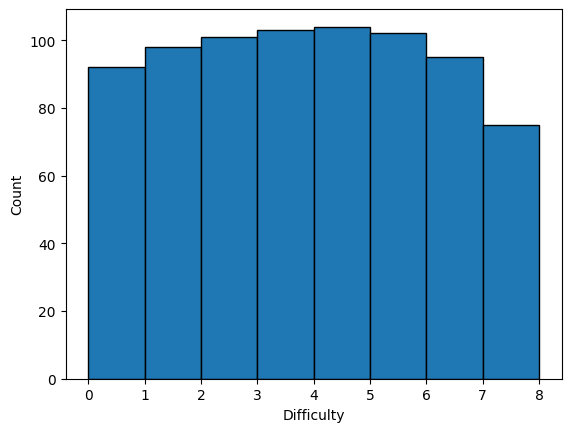

In [28]:
# 给我一个柱状图，是sudoku的难度分布
plt.hist(df['difficulty'], bins=range(0, 9), edgecolor='black')
# 很坐标纵坐标
plt.xlabel('Difficulty')
plt.ylabel('Count')
